#Interpolation

Very often we have measured a series of physical quantities $y_{i}$ that have a dependendence on some variables $x_{i}$
and want to know the expected values of $y$ for values of $x$ that we didn't measure.

If the values of $x$ are inside the range of $x_{i}$ we call this procedure *interpolation*. If they are beyond we call it *extrapolation*. 

The process of interpolation is usually done in two steps:

1. Finding a analytical function that goes over the provided points
2. Evaluating that function at the desired point $x$

A proper interpolation procedure in physics should actually create a model 
that provides the analytical function over which we expect that
all the points will lie, including the desired points we haven't measured. However, such physical insight is not always available. That's why we will define a *mathematical* framework for the interpolation, forgetting (gasp!) that we want to apply this techniques in a physical setting.


##First steps - 1D interpolation

We will explore different fitting routines and methods availably in scipy. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import interpolate 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#generate data for a known funcion
x = linspace(0.0,10.0,21)
y = sin(x**1.5 + 2.0)
x_true = linspace(0.0,10.0,1000)
y_true = sin(x_true**1.5 + 2.0)

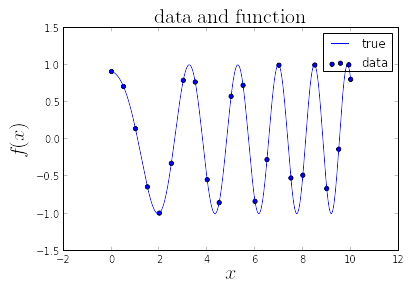

In [4]:
#first visualization
plot(x_true, y_true)
scatter(x,y)
legend(['true','data'])

#make a nice plot
ax = axes()
ax.set_xlabel("$x$",fontsize=20)
ax.set_ylabel("$f(x)$",fontsize=20)
ax.set_title("$\mathrm{data\ and\ function}$", fontsize=20)
filename = 'figure1'
savefig(filename + '.pdf',format = 'pdf', transparent=True)

In the linear interpolation a line is drawn between two adjacednt points $(x_0, y_0)$ and $(x_1,y_1)$.

In that case the interpolating function can be defined from

$$
\frac{y-y_0}{x-x_0} = \frac{y_1-y_0}{x_1-x_0}
$$

solving for the value of $y$

$$
y = y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}
$$


Generalizing this logic, one could suggest that for $N$ points in the the plane $(x_i,y_i)$ there will be a unique polinomial
of degree less $N-1$ that passes through all the points, $P(x_i)=y_i$, $i=1,\ldots,N$.

The polynomial $P$ can be written as:

$$
P(x) = \sum_{i=1}^N\left(\prod_{j=1,j\neq i}^N \frac{x - x_{j}}{x_{i}-x_{j}}\right) y_{i} 
$$

or in a equivalent way

$$
P(x) = \sum_{i=1}^N P_{i} (x)
$$

where
$$
P_i (x) = y_i \prod_{j=1, j\neq i}^{N} \frac{x-x_{j}}{x_i - x_j}
$$

Which is known as the lagrangian form of the polynomial.


In the case of $N=2$

$$
y = y_0 \frac{x-x_1}{x_0-x_1} + y_1\frac{x-x_0}{x_1-x_0}
$$


In [5]:
x_in = array([0,1])
y_in = array([1,4])
def poli(x, x_in, y_in):
    value = y_in[0]*((x-x_in[1])/(x_in[0]-x_in[1])) + y_in[1]*((x-x_in[0])/(x_in[1]-x_in[0]))
    return value

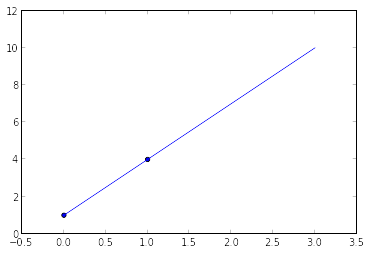

In [6]:
x_l = linspace(0.0,3.0,100)
y_l = poli(x_l, x_in, y_in)
plot(x_l,y_l)
scatter(x_in, y_in)

In the case of $N=3$

In [7]:
x_in = array([0,1,5])
y_in = array([1,4,-2])
def poli(x, x_in, y_in):
    p0 = y_in[0]*((x-x_in[1])/(x_in[0]-x_in[1]))*((x-x_in[2])/(x_in[0]-x_in[2]))
    p1 = y_in[1]*((x-x_in[0])/(x_in[1]-x_in[0]))*((x-x_in[2])/(x_in[1]-x_in[2]))
    p2 = y_in[2]*((x-x_in[0])/(x_in[2]-x_in[0]))*((x-x_in[1])/(x_in[2]-x_in[1]))
    value = p0 + p1 + p2
    return value

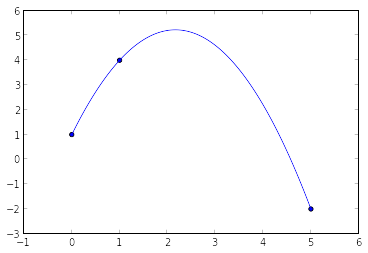

In [8]:
x_l = linspace(0.0,5.0,100)
y_l = poli(x_l, x_in, y_in)
plot(x_l,y_l)
scatter(x_in, y_in)

In [10]:
#defines a linear interpolation
flinear = interpolate.interp1d(x, y)
fcubic = interpolate.interp1d(x,y,kind = "cubic")

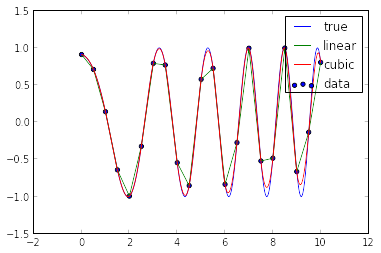

In [11]:
#other kinds of interpolation are 'linear','nearest', 'zero', 'slinear', 'quadratic'
scatter(x,y)
plot(x_true, y_true)
plot(x_true, flinear(x_true))
plot(x_true, fcubic(x_true))
legend(['true', 'linear', 'cubic' ,'data'])

(8, 10)

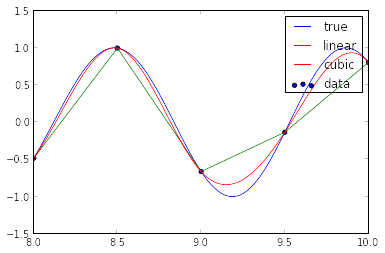

In [24]:
scatter(x,y)
plot(x_true, y_true)
plot(x_true, flinear(x_true))
plot(x_true, fcubic(x_true))
legend(['true', 'linear', 'cubic' ,'data'])
xlim(8,10)

The problem with the linear interpolations is that the derivatives clearly jump from one side to the other of the data points. In the case of using all the points to define a polynomial the problem is that the values of the function can be too 
off from the true function.


A way to solve this problem is the method of *splines*. A spline is a piecewise polynomial, each piece joining to points. Depending on the kind
of spline one is doing, one is looking for different characteristics for this set of polinomial.

For instance, in the case of a cubic spline one is looking for segments of polynomials that will be smooth in the first derivative and continuous in the second derivative.

**A Practical Guide to Splines (revised edition)** by Carl de Boor is one of the best references if you really want to dig into the subject.


###Example

[Wikipedia](http://en.wikipedia.org/wiki/Spline_%28mathematics%29) gives us a nice example of a spline in three pieces that has a bell shape. (Irwin-Hall distribution polynomials)


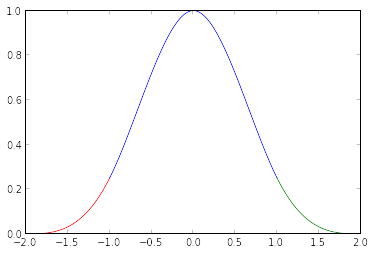

In [13]:
x1 = linspace(-2.0, -1.0,100)
x2 = linspace(-1.0,1.0,100)
x3 = linspace(1.0,2.0,100)

y1 = 0.25*(x1+ 2.0)**3.0
y2 = 0.25*(3*abs(x2)**3.0 -6.0*x2**2 + 4.0)
y3 = 0.25*(2.0-x3)**3.0
plot(x1,y1, color='red')
plot(x2,y2, color='blue')
plot(x3,y3, color='green')

(8, 10)

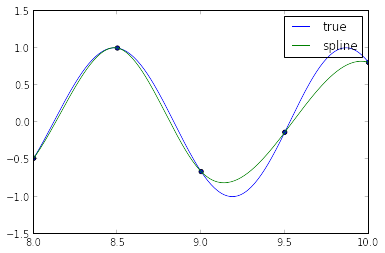

In [29]:
#this is how a spline is used in numpy
tck  = interpolate.splrep(x, y)
y_spline = interpolate.splev(x_true,tck)
scatter(x,y)
plot(x_true, y_true)
plot(x_true, y_spline)
legend(['true', 'spline'])
xlim(8,10)

## 2D interpolation

In [30]:
# I create a 2D function
def my_func(x, y):
    return exp(-((x-0.5)**2)/0.1) * cos(15.0*(y**2))

Now show it on 500 points

In [31]:
# show on 500 points
points = np.random.rand(500, 2)
values = my_func(points[:,0], points[:,1])

In [32]:
#here i define a dense grid in x-y with ranges [0,1], [0,1] to see the complete funcion
grid_x, grid_y = mgrid[0:1:200j, 0:1:200j]

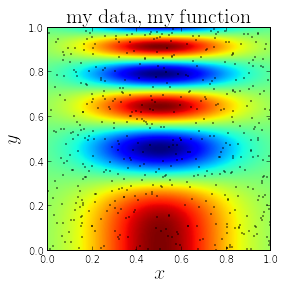

In [33]:
imshow(my_func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plot(points[:,0], points[:,1], 'k.', ms=2, alpha = 0.8)

ax = axes()
ax.set_xlabel("$x$",fontsize=20)
ax.set_ylabel("$y$",fontsize=20)
ax.set_title("$\mathrm{my\ data,\ my\ function}$", fontsize=20)

Now let's add some nice interpolation functions (2d, in this case). Let' s try nearest, linear and cubic interpolators:

In [34]:
from scipy.interpolate import griddata
grid_zA = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_zB = griddata(points, values, (grid_x, grid_y), method='linear')
grid_zC = griddata(points, values, (grid_x, grid_y), method='cubic')

In [35]:
grid_zA.T

array([[ 0.09056036,  0.09056036,  0.09056036, ...,  0.10814969,
         0.10814969,  0.09005732],
       [ 0.09056036,  0.09056036,  0.09056036, ...,  0.10814969,
         0.09005732,  0.09005732],
       [ 0.09056036,  0.09056036,  0.09056036, ...,  0.09005732,
         0.09005732,  0.09005732],
       ..., 
       [-0.01012987, -0.01012987, -0.01012987, ..., -0.02903346,
        -0.02903346, -0.02903346],
       [-0.01012987, -0.01012987, -0.01012987, ..., -0.02903346,
        -0.02903346, -0.02903346],
       [-0.01012987, -0.01012987, -0.01012987, ..., -0.02903346,
        -0.02903346, -0.02903346]])

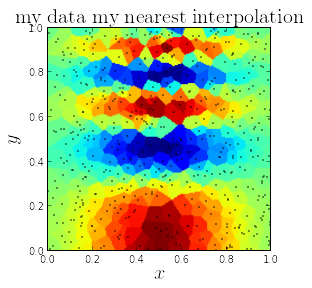

In [36]:
imshow(grid_zA.T, extent=(0,1,0,1), origin='lower')
plot(points[:,0], points[:,1], 'k.', ms=2, alpha = 0.8)

ax = axes()
ax.set_xlabel("$x$",fontsize=20)
ax.set_ylabel("$y$",fontsize=20)
ax.set_title("$\mathrm{my\ data\, my\ nearest\ interpolation}$", fontsize=20)

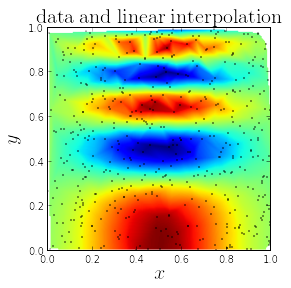

In [37]:
imshow(grid_zB.T, extent=(0,1,0,1), origin='lower')
plot(points[:,0], points[:,1], 'k.', ms=2, alpha = 0.8)

ax = axes()
ax.set_xlabel("$x$",fontsize=20)
ax.set_ylabel("$y$",fontsize=20)
ax.set_title("$\mathrm{data\ and\ linear\ interpolation}$", fontsize=20)

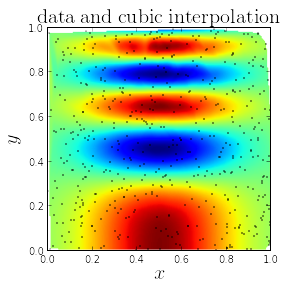

In [38]:
imshow(grid_zC.T, extent=(0,1,0,1), origin='lower')
plot(points[:,0], points[:,1], 'k.', ms=2, alpha = 0.8)

ax = axes()
ax.set_xlabel("$x$",fontsize=20)
ax.set_ylabel("$y$",fontsize=20)
ax.set_title("$\mathrm{data\ and\ cubic\ interpolation}$", fontsize=20)

This brief outline is based on the the scipy documentation webpage: http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

# Exercise

A) Write a program in Python that given a set of N points in $x$ and $y$ returns the interpolating polinomial.
Test it with the following arrays

In [39]:
x_in = array([1.0,2.0,4.0,5.0,6.0,7.0,8.0])
y_in = array([3.0,-2.0,2.0,4.0,1.0,2.0,3.0])

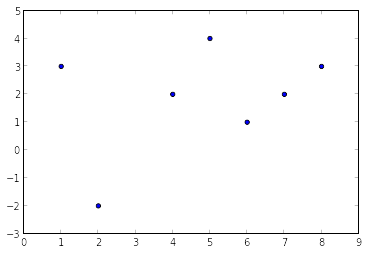

In [40]:
scatter(x_in, y_in)

B) Find the interpolating polinomials for the three set of points taken from the following function

In [41]:
def p(x):
    return 1.0/(5.0-75.0*x**2)

In [42]:
a = linspace(-1.0,1.0,3)
print(p(a))
b = linspace(-1.0,1.0,5)
print(p(b))
c = linspace(-1.0,1.0,9)
print(p(c))

[-0.01428571  0.2        -0.01428571]
[-0.01428571 -0.07272727  0.2        -0.07272727 -0.01428571]
[-0.01428571 -0.02689076 -0.07272727  3.2         0.2         3.2
 -0.07272727 -0.02689076 -0.01428571]


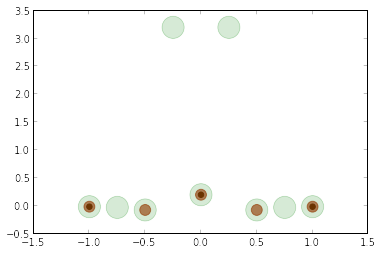

In [43]:
scatter(a,p(a), color="black", alpha=1.0, s=30)
scatter(b,p(b), color="red", alpha=0.7,s=120)
scatter(c,p(c), color="green", alpha=0.4,s=500)

C) 
Determine the quadratic polynomial $p(x)$ that interpolates the data
$$
(-1,3),~~(0,-1),~~(1,2)
$$
using:
- the Lagrange form of interpolating polynomials.

\begin{align}
L_1(x) &= \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)},\\\\
L_2(x) &= \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)},\\\\
L_3(x) &= \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}
\end{align}

Tip: Using Vandermonde:

In [44]:
xj = array([-1, 0., 1.])
yj = array([3., -1., 2.])
A = vstack((xj**0, xj, xj**2)).T
print(A)

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]


In [45]:
from numpy.linalg import solve
c = solve(A,yj)
print(c)

[-1.  -0.5  3.5]


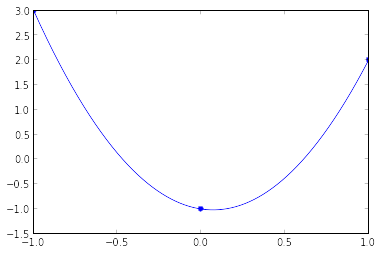

In [46]:
x = linspace(-1, 1, 1001)
p = c[0] + c[1]*x + c[2]*x**2
plot(x,p)
hold(True)
plot(xj,yj,'b.',markersize=10)